<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/06-11/LiTaO3_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 122 (delta 45), reused 36 (delta 8), pack-reused 0
Receiving objects: 100% (122/122), 4.40 MiB | 7.91 MiB/s, done.
Resolving deltas: 100% (45/45), done.


'/content'

# 24-05-23 LiTaO3 gating

Conductance increased 50x (1V Vds, current from 20nA to 0.1nA) after gating overnight at 1V Vpp offset to 20mV (OCV ~20mV, stabilizing around 16mV), 10s period, 1% duty cycle.


# Base Time
Inaccurate: first minutes were taken here but buffer overflowed and was overwritten with the most recent data.

`full_buffer` ends at 10am June 12.

06/11/2024 13:13:21.694113680

In [3]:
%cd "/content/gator/data/06-11"

/content/gator/data/06-11


In [28]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[7])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)


In [9]:
df = pd.read_csv('full_buffer.csv')


In [13]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e9

# Potential (mV)
V = df['Value'] * 1e3

(110.0, 125.0)

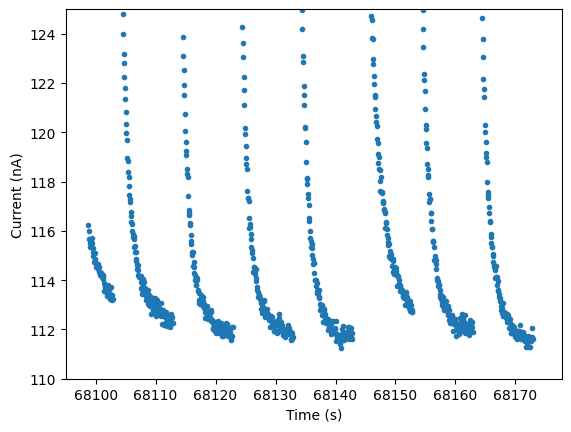

In [22]:
cut1 = 0
cut2 = 1000
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')
plt.ylim(110,125)

# First minutes



In [29]:
prep_csv('first_minute.csv')
df = pd.read_csv('first_minute.csv')

Base Time,06/11/2024 13:13:21.694113680



In [32]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e9

# Potential (mV)
V = df['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

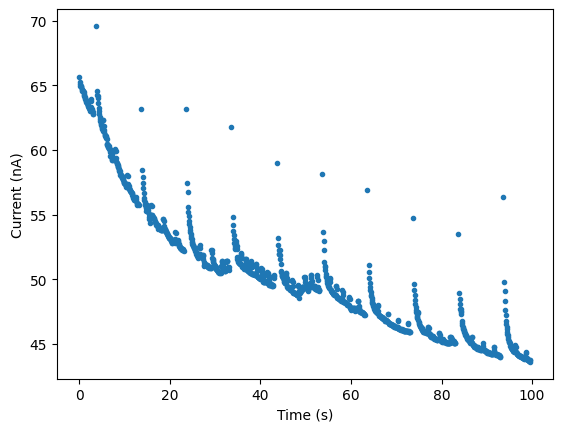

In [34]:
cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')
